In [1]:
]build

   Building FFTW ────────────→ `/srv/julia/pkg/packages/FFTW/DMUbN/deps/build.log`
   Building BioformatsLoader → `~/deps/build.log`


In [2]:
]add Images ImageMagick

   Updating registry at `/srv/julia/pkg/registries/General`
  Resolving package versions...
No Changes to `~/Project.toml`
No Changes to `~/Manifest.toml`


In [3]:
using BioformatsLoader
using Images
BioformatsLoader.init()

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1278


The following code downloads an example image from https://downloads.openmicroscopy.org/images/ to the `outdir` directory and displays the license.

In [4]:
outdir = "images"
images_url = "https://downloads.openmicroscopy.org/images"
mkpath(outdir)
filename = mktempdir() do dir
    path = "ND2/maxime/BF007.nd2"
    outpath = joinpath(outdir, basename(path))
    file = download("$images_url/$path", outpath)
    readmefile = download("$images_url/$(dirname(path))/readme.txt", joinpath(dir, "readme.txt"))
    readme = open(readmefile) do txt
        read(txt, String)
    end
    print(readme)
    file
end
println("\nDownloaded file:\n\t$filename")

Sample Nikon ND2 file (c) by Maxime Woringer

See
http://lists.openmicroscopy.org.uk/pipermail/ome-users/2017-August/006621.html
and https://github.com/openmicroscopy/bioformats/pull/2966.
This image contains one single plane of dimensions 164x156.

This files is licensed under a
Creative Commons Attribution 4.0 International License.

You should have received a copy of the license along with this
work. If not, see <http://creativecommons.org/licenses/by/4.0/>.

Downloaded file:
	images/BF007.nd2


In [5]:
readdir(outdir)

1-element Array{String,1}:
 "BF007.nd2"

In [6]:
images = bf_import(filename)
display(length(images))

1

In [7]:
display(size(images[1]))

(1, 1, 156, 164, 1)

Dict{Symbol,Any} with 5 entries:
  :ObjectiveSettings => Dict{Symbol,Any}(:ID=>"Objective:0:0",:RefractiveIndex=…
  :ID                => "Image:0"
  :InstrumentRef     => Dict{Symbol,Any}(:ID=>"Instrument:0")
  :Pixels            => Dict{Symbol,Any}(:SizeZ=>1,:ID=>"Pixels:0",:SizeY=>156,…
  :Name              => "BF007.nd2 (series 1)"

┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1278


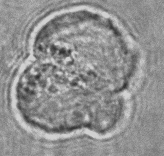

In [8]:
display(properties(images[1]))
display(Gray.(reinterpret.(N0f16, images[1]))[1,1,:,:,1])